In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Plot payoff graphs for different derivative contracts / trading strategies

### some formulas:

### *Long call payoff : C(K) = max(S_T-K,0)

### *Long put payoff : P(K) = max(K-S_T,0)


## In this part, we have 4 cells. These cells by order are for Long call, short call, long put and short put payoff graphs

In [4]:
K = 100
S_T = np.arange(201) # create an array of stock prices [0,1,2, ... , 199,200]

Text(0.5, 0, 'S_T')

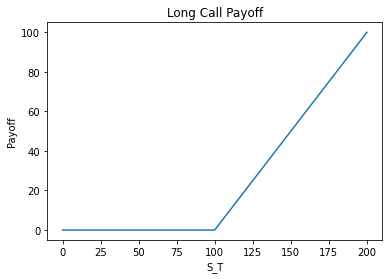

In [5]:
########### Long Call payoff  cell ###########
payoff_long_call = np.maximum(S_T - K, 0)

plt.plot(S_T, payoff_long_call)
plt.title("Long Call Payoff")
plt.ylabel("Payoff")
plt.xlabel("S_T")


Text(0.5, 0, 'S_T')

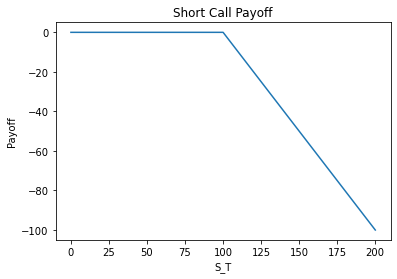

In [4]:
########### Short Call payoff cell ###########
payoff_short_call = -np.maximum(S_T - K, 0)

plt.plot(S_T, payoff_short_call)
plt.title("Short Call Payoff")
plt.ylabel("Payoff")
plt.xlabel("S_T")


Text(0.5, 0, 'S_T')

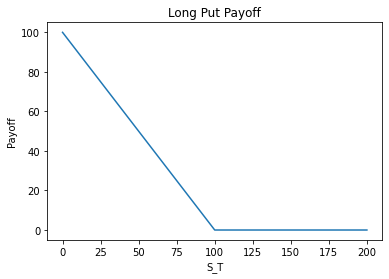

In [17]:
########### Long Put payoff cell ###########
payoff_long_put = np.maximum(K - S_T, 0)
plt.plot(S_T, payoff_long_put)
plt.title("Long Put Payoff")
plt.ylabel("Payoff")
plt.xlabel("S_T")


Text(0.5, 0, 'S_T')

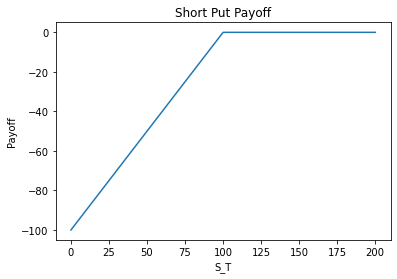

In [20]:
########### Short Put payoff sell ###########
payoff_short_put = -np.maximum(K - S_T, 0)
plt.plot(S_T, payoff_short_put)
plt.title("Short Put Payoff")
plt.ylabel("Payoff")
plt.xlabel("S_T")


# Part b)
## In this part, we will draw the graph of call bull spread by the following formula: 

## payoff = C(K1)-C(K2)

Text(0, 0.5, 'Payoff')

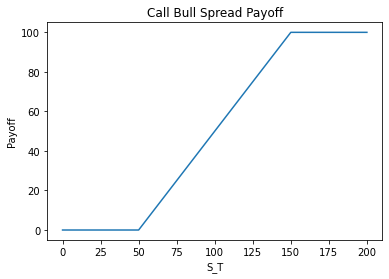

In [22]:
##############  Call Bull spread payoff cell #############
K1 = 50
K2 = 150

Call_K1 = np.maximum(S_T - K1 , 0)
Call_K2 = np.maximum(S_T - K2 , 0)
payoff = Call_K1 - Call_K2
plt.plot(S_T, payoff)
plt.title("Call Bull Spread Payoff")
plt.xlabel("S_T")
plt.ylabel("Payoff")


# Part c)
## In this part we will gragh the payoff of short put straddle given by : 
## payoff = P(K1)-2P(K2)+P(K3)

Text(0, 0.5, 'Payoff')

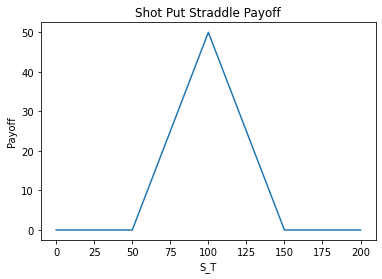

In [24]:
##############  Short Put Straddle Payoff cell #############
K1 = 50
K2 = 100
K3 = 150

Put_K1 = np.maximum(K1 - S_T , 0)
Put_K2 = np.maximum(K2 - S_T , 0)
Put_K3 = np.maximum(K3 - S_T , 0)
payoff = Put_K1 - 2 * Put_K2 + Put_K3
plt.plot(S_T, payoff)
plt.title("Shot Put Straddle Payoff")
plt.xlabel("S_T")
plt.ylabel("Payoff")

             # plot payoff function
             # add title to graph "Short Put Straddle Payoff"
             # add x label "S_T"
             # add y label "Payoff"

## We will build binomial model with the help of 2D arrays

# Part a)

## Create a function that calculates the put price using binomial model check (Fig 10.5 page 309 in Derivative Markets 4th Edition) 

In [10]:
def BinomalT_put(S0, K, T, r, u, d, N):
    h = T / N
    p = (np.exp(r * h) - d) / (u - d)
    discount = np.exp(-1*r*h)
    stock = -1*np.ones([N+1,N+1])
    option = -1*np.ones([N+1,N+1])

    for j in range(N + 1):
        for i in range(N + 1):
            stock[i,j] = S0 * (d ** i) * (u ** j)

    #evaluate option
    temp = N
    for i in range(N + 1):
        option[i, temp] = np.maximum(K - stock[i, temp], 0)
        temp -= 1

    for j in range(N-1, -1, -1):
        for i in range(N - 1 - j , -1, -1): 
            option[i,j] = discount * (option[i, j + 1] * p + (1 - p) * option[i + 1, j])
            
    return option[0,0]

########### Do not change values ##############
u = 50.071/41.0   
d = 35.411/41.0
S0 = 41.0
r = 0.08
T = 1
K = 40
#############################################
N = 3

option_price = BinomalT_put(S0, K, T, r, u, d, N)


print(f"option price = {option_price}")

option price = 2.9987543483518446


# Part b)

## Calculate the put price in the part (a) using different values of N, plot the BinomalT_put(S0, K, T, r, u, d, N) vs N.
### Note: Values that are given in part (a) for (S0, K, T, r, u, d).

list of powers = [   1    2    4    8   16   32   64  128  256  512 1024 2048]


Text(0.5, 0, 'N')

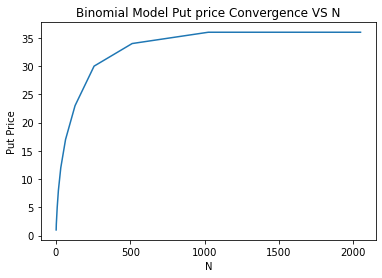

In [11]:
N = np.arange(0, 12)
N = np.power(2 , N)
prices = np.arange(len(N)) * 0


#loop for values in N and collect option prices in prices array
x = 0
for i in N:
    prices[x] = BinomalT_put(S0, K, T, r, u, d, i)
    x += 1

plt.plot(N, prices)
plt.title("Binomial Model Put price Convergence VS N")
plt.ylabel("Put Price")
plt.xlabel("N")

## Create an ABM function that takes the following parameters:
### n := number of paths to be simulated
### m := number of discretization points per path
### S0 := initial starting point
$$ dS = \mu dt + \sigma dW $$

In [13]:
def ABM(n,m,S0,mu,sigma,dt):
    np.random.seed(999)
    arr = np.zeros((n , m)) # create 2D zeros array with the correct dimensions
    arr[:, 0] = S0
    #initialize column 0 
    # fill in array entries
    for i in range(n):
        for j in range(m-1):
            arr[i,j+1] = float(arr[i,j])  + mu*dt + sigma * np.sqrt(dt) * np.random.normal(0, 1)
    return arr

# part b)
### ABM(n=1000,m=20,S0=100,mu=0,sigma=0.001,dt=1)

Text(0.5, 0, 'm')

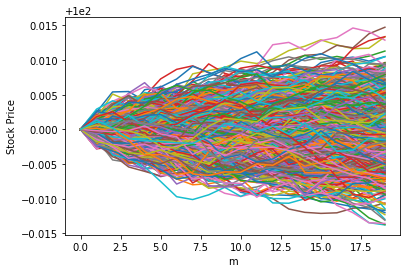

In [14]:
x = ABM(1000, 20, 100, 0, 0.001, 1)
for i in range(1000):
    plt.plot(range(20), x[i])

plt.ylabel("Stock Price")
plt.xlabel("m")


# part c)
### ABM(n=1000,m=20,S0=100,mu=-0.001,sigma=0.001,dt=1)

Text(0.5, 0, 'm')

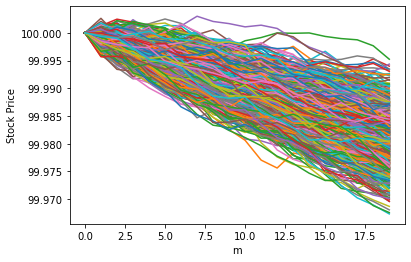

In [15]:
y = ABM(1000, 20, 100, -0.001, 0.001, 1)
for a in range(1000):
    plt.plot(range(20), y[a])

plt.ylabel("Stock Price")
plt.xlabel("m")

# Q4
## Create an GBM function that takes the following parameters:
### n := number of paths to be simulated
### m := number of discretization points per path
### S0 := initial starting point
$$ d[ln(S_t)] = (\mu - \frac{\sigma^2}{2}) dt + \sigma dW_t $$ 
### Then convert it to $$S_t$$

In [3]:
def GBM(n,m,S0,mu,sigma,dt):
    np.random.seed(999)
    arr = np.zeros((n , m)) # create 2D zeros array with the correct dimensions
    arr[:, 0] = np.log(S0)
    for i in range(n):
        for j in range(m-1):
            arr[i,j+1] = (float(arr[i,j])) + (mu - (sigma ** 2)/2) * dt + sigma * np.sqrt(dt) * np.random.normal(0, 1)
    arr = np.exp(arr)
    return arr


# part b)
### GBM(n=1000,m=20,S0=100,mu=0,sigma=0.001,dt=1)
### the result sould look like a bell shape centerd around y = S0 line

[[100.         100.01266659 100.15292168 ... 100.06220448 100.22246939
  100.32112104]
 [100.          99.91644019  99.89774265 ...  99.5648749   99.51797265
   99.56575495]
 [100.         100.10662543 100.22239741 ... 100.55906423 100.53868062
  100.38142922]
 ...
 [100.         100.03770376 100.01994737 ... 100.69394    100.83526544
  100.97125781]
 [100.          99.99213242  99.94559992 ... 100.42930702 100.55470301
  100.68463069]
 [100.          99.85513661  99.85536973 ...  99.55590385  99.49879595
   99.81075772]]


Text(0.5, 0, 'm')

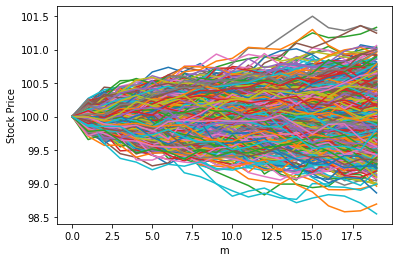

In [4]:
x = GBM(1000, 20, 100, 0, 0.001, 1)
print(x)
for i in range(1000):
    plt.plot(range(20), x[i])

plt.ylabel("Stock Price")
plt.xlabel("m")

# Part c)
### GBM(n=1000,m=20,S0=100,mu=-0.001,sigma=0.001,dt=1)
### the result sould look like a bell shape centerd around y = S0 line

Text(0.5, 0, 'm')

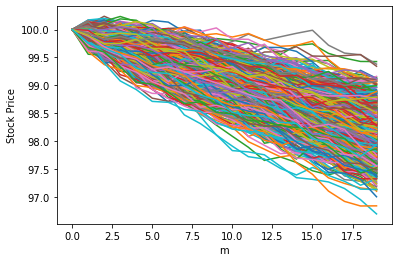

In [36]:
x = GBM(1000, 20, 100, -0.001, 0.001, 1)
for i in range(1000):
    plt.plot(range(20), x[i])

plt.ylabel("Stock Price")
plt.xlabel("m")

# Q5


# Part a)
## Import the Data1.csv file into a pd 

In [6]:
#create a dataframe by importing the csv file through "pd" or "pandas" library
df = pd.read_csv("Currency Data.csv")
#### do not modify below this line
#print(df.head())
### notice the columns names in the dataframe

print(df.head())

       DJIA    FTSE  USDGBP    CAC40  EURUSD    Nikkei  YENUSD
0  11219.38  5828.8  1.9098  4956.34  0.7776  15154.06  115.00
1  11173.59  5818.1  1.9072  4967.95  0.7789  15464.66  115.08
2  11076.18  5860.5  1.9086  5025.15  0.7762  15656.59  115.17
3  11124.37  5823.4  1.8918  4976.64  0.7828  15630.91  115.41
4  11088.02  5820.1  1.8970  4985.52  0.7833  15565.02  116.07


# Part b)
## calculate log returns given by $$ R_t = ln[S_t/S_{t-1}]$$
## for every column in the data frame

In [59]:
for col in df.columns:
    for i in range(1,(len(df[col]))):
        #df[col][i-1] = np.log(df[col][i] / df[col][i-1])
        df[col][i-1] = (np.log(df[col][i] / df[col][i-1]))

df = df.drop([500])
print(df.head())
print(df.tail())

       DJIA      FTSE    USDGBP     CAC40    EURUSD    Nikkei    YENUSD
0 -0.004090 -0.001837 -0.001362  0.002340  0.001670  0.020289  0.000695
1 -0.008756  0.007261  0.000734  0.011448 -0.003472  0.012334  0.000782
2  0.004341 -0.006351 -0.008841 -0.009700  0.008467 -0.001642  0.002082
3 -0.003273 -0.000567  0.002745  0.001783  0.000639 -0.004224  0.005702
4  0.000888  0.008691 -0.002481  0.012242  0.001786  0.018592  0.003269
         DJIA      FTSE    USDGBP     CAC40    EURUSD    Nikkei    YENUSD
495  0.037919 -0.006617  0.013168 -0.010618 -0.012855 -0.022419  0.001240
496  0.032915  0.084691  0.007338  0.088679 -0.002015  0.036874  0.018141
497 -0.033278 -0.014221  0.006201 -0.023716 -0.015972  0.014138 -0.000187
498 -0.017447 -0.027238  0.004437 -0.026139 -0.001905  0.002019 -0.007049
499  0.018025  0.019704 -0.002757  0.026921 -0.000293 -0.008996  0.003671


# Part C)
## For every column in dataframe calculate mean,standard deviation, skewness and kurtosis using the dataframe functions

### note print format "column=, mean = , std = ,skew = , kurtosis = "
### limit decimal printing to 4 digits

In [56]:
for col in df.columns:
    
    print('col=' + str(col) + ', mean=' + str(df[col].mean()) + ', std='+str(df[col].std()) + ', skew=' + str(df[col].skew()) + ', kurtosis=' + str(df[col].kurtosis()))

col=DJIA, mean=-3.548784199271471e-05, std=0.011106165100845245, skew=-0.31188678366046085, kurtosis=1.9669125439246016
col=FTSE, mean=-0.0002294592224917165, std=0.012840026581187252, skew=0.1307459719085228, kurtosis=6.291511498200549
col=USDGBP, mean=-6.665509095163285e-05, std=0.005188309912246715, skew=-0.3566744511240558, kurtosis=1.1239256303810525
col=CAC40, mean=-0.00031843998737707036, std=0.013386779605951079, skew=0.27201577311997055, kurtosis=5.203010485502837
col=EURUSD, mean=-0.00026324514955498114, std=0.004904187742915505, skew=0.23316144153464685, kurtosis=1.706598715374922
col=Nikkei, mean=-0.0004656356288046678, std=0.014784628370857842, skew=-0.7903255723677772, kurtosis=4.3314469707343815
col=YENUSD, mean=-0.00015507719839005316, std=0.006725250109937131, skew=-1.0110711818855709, kurtosis=5.315268939296887


# Are the log-returns normally distributed like the Geometric Brownian Motion states?

# Answer:

Most of the values of skewness are quite reasonably close to 0 except from YENUSD. The kurtosis of the returns is somewhat positively dominant in FTSE, CAC40, Nikkei and YENUSD however It can be determined that the log returns are normally distributed.
